# EDA

### 차례
- 패키지, 데이터 불러오기
- 데이터 살펴보기
- 이상치 살펴보기
- 연월일시간 col 추가
- 시각화

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from scipy import stats

In [2]:
# 노트북에 plot 그리기
%matplotlib inline    
# plot의 글씨 선명하게
%config InlineBackend.figure_format = 'retina'  

plt. style.use('ggplot')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) # Mac의 경우는 AppleGothic, 윈도우의 경우는 Malgun Gothic을 사용하면 됩니다 :) 
mpl.rc('axes', unicode_minus=False)

In [66]:
raw_train = pd.read_csv("D:/07_Kaggle/01_bikesharingdemansion/train.csv",parse_dates=["datetime"])
train=raw_train.copy()
raw_test=pd.read_csv("D:/07_Kaggle/01_bikesharingdemansion/test.csv",parse_dates=["datetime"])
test=raw_test.copy()
train.shape


(10886, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [8]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### 결측치

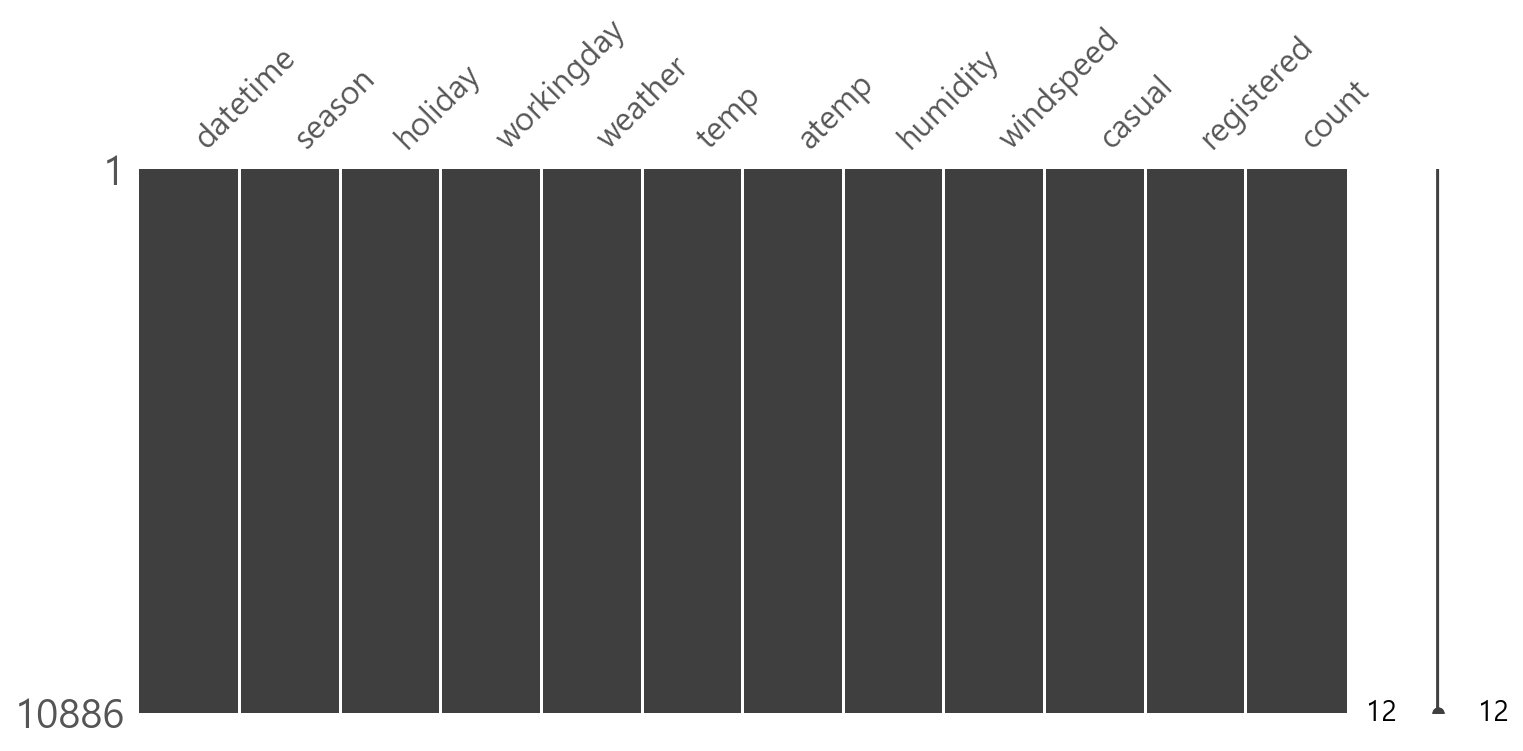

In [9]:
import missingno as msno
# conda install -c conda-forge/label/cf201901 missingno
msno.matrix(train, figsize=(12,5))

In [10]:
# 연월일.. 데이터 생성
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train.shape

(10886, 18)

In [11]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


### 시각화

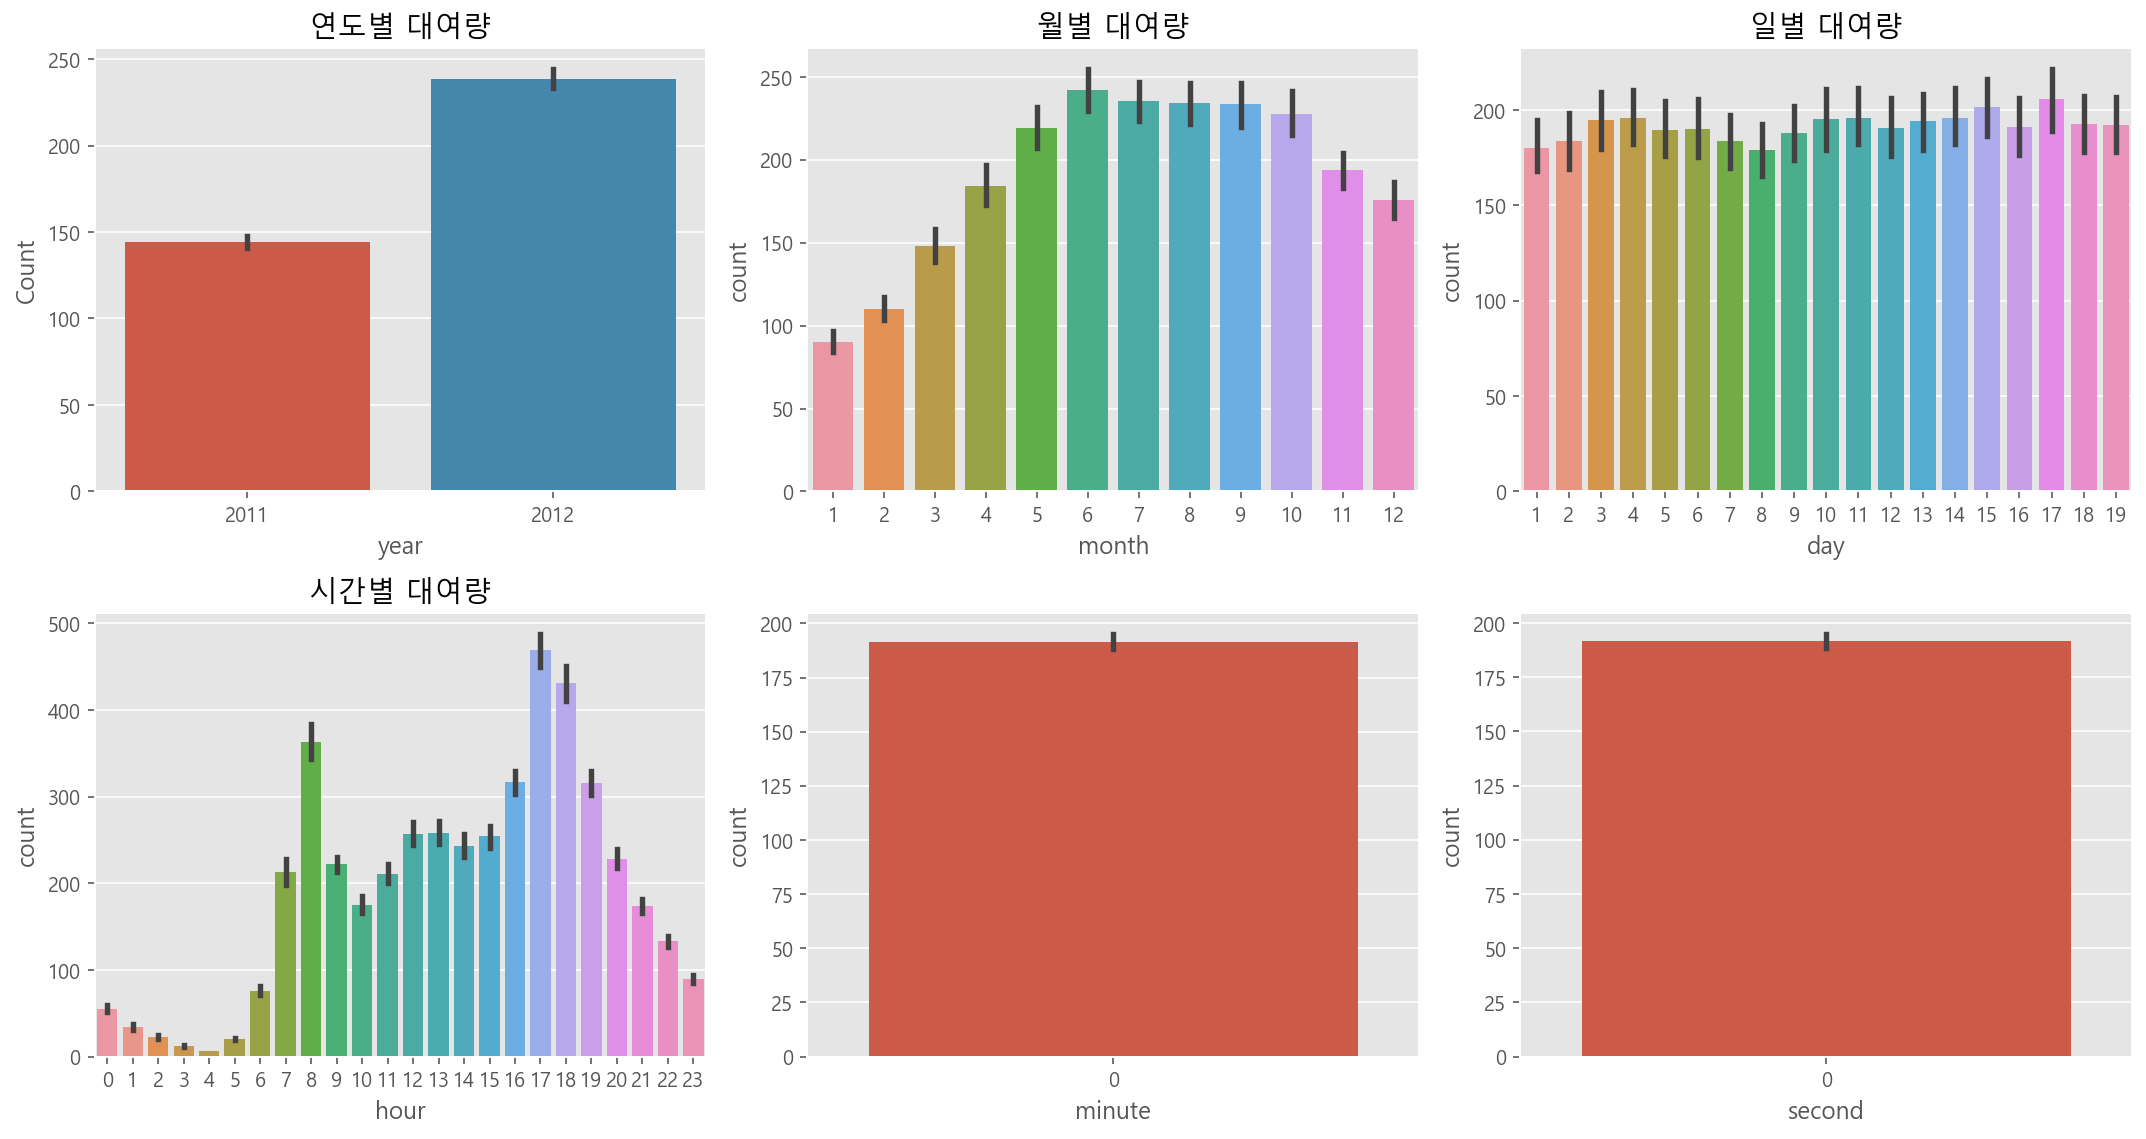

In [12]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(15,8)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
sns.barplot(data=train, x="day", y="count", ax=ax3)
sns.barplot(data=train, x="hour", y="count", ax=ax4)
sns.barplot(data=train, x="minute", y="count", ax=ax5)
sns.barplot(data=train, x="second", y="count", ax=ax6)

ax1.set(ylabel='Count',title="연도별 대여량")
ax2.set(xlabel='month',title="월별 대여량")
ax3.set(xlabel='day', title="일별 대여량")
ax4.set(xlabel='hour', title="시간별 대여량")
plt.tight_layout()

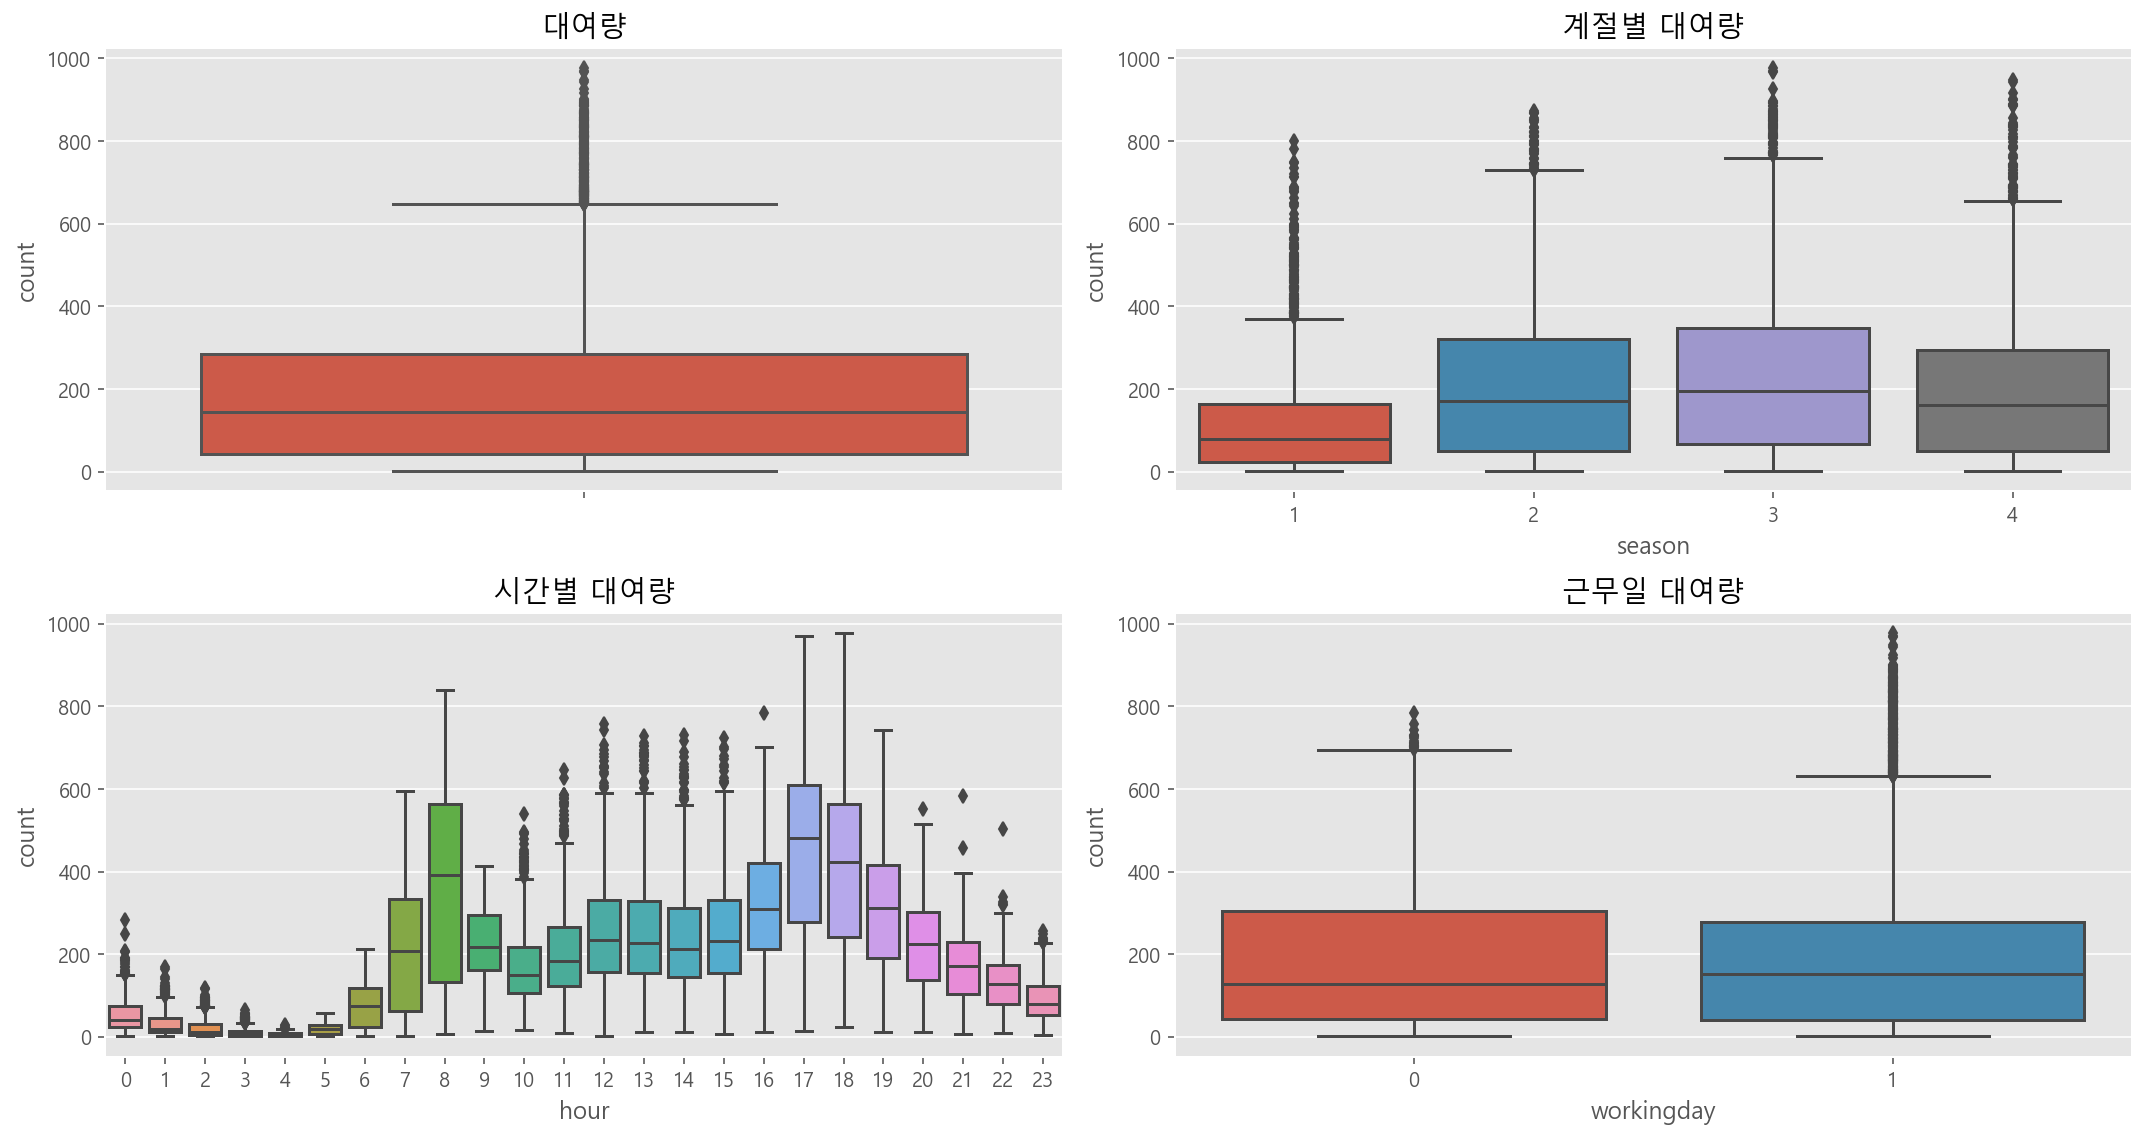

In [13]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(15,8)

# categorical 변수들의 시각화
sns.boxplot(data = train, y="count",orient="v",ax=ax1)
sns.boxplot(data = train, y="count", x="season", orient="v",ax=ax2)
sns.boxplot(data = train, y="count", x="hour",orient="v",ax=ax3)
sns.boxplot(data = train, y="count", x="workingday",orient="v",ax=ax4)

ax1.set(title="대여량")
ax2.set(title="계절별 대여량")
ax3.set(title="시간별 대여량")
ax4.set(title="근무일 대여량")
plt.tight_layout()

In [14]:
train["dayofweek"]=train["datetime"].dt.dayofweek

In [15]:
train["dayofweek"].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

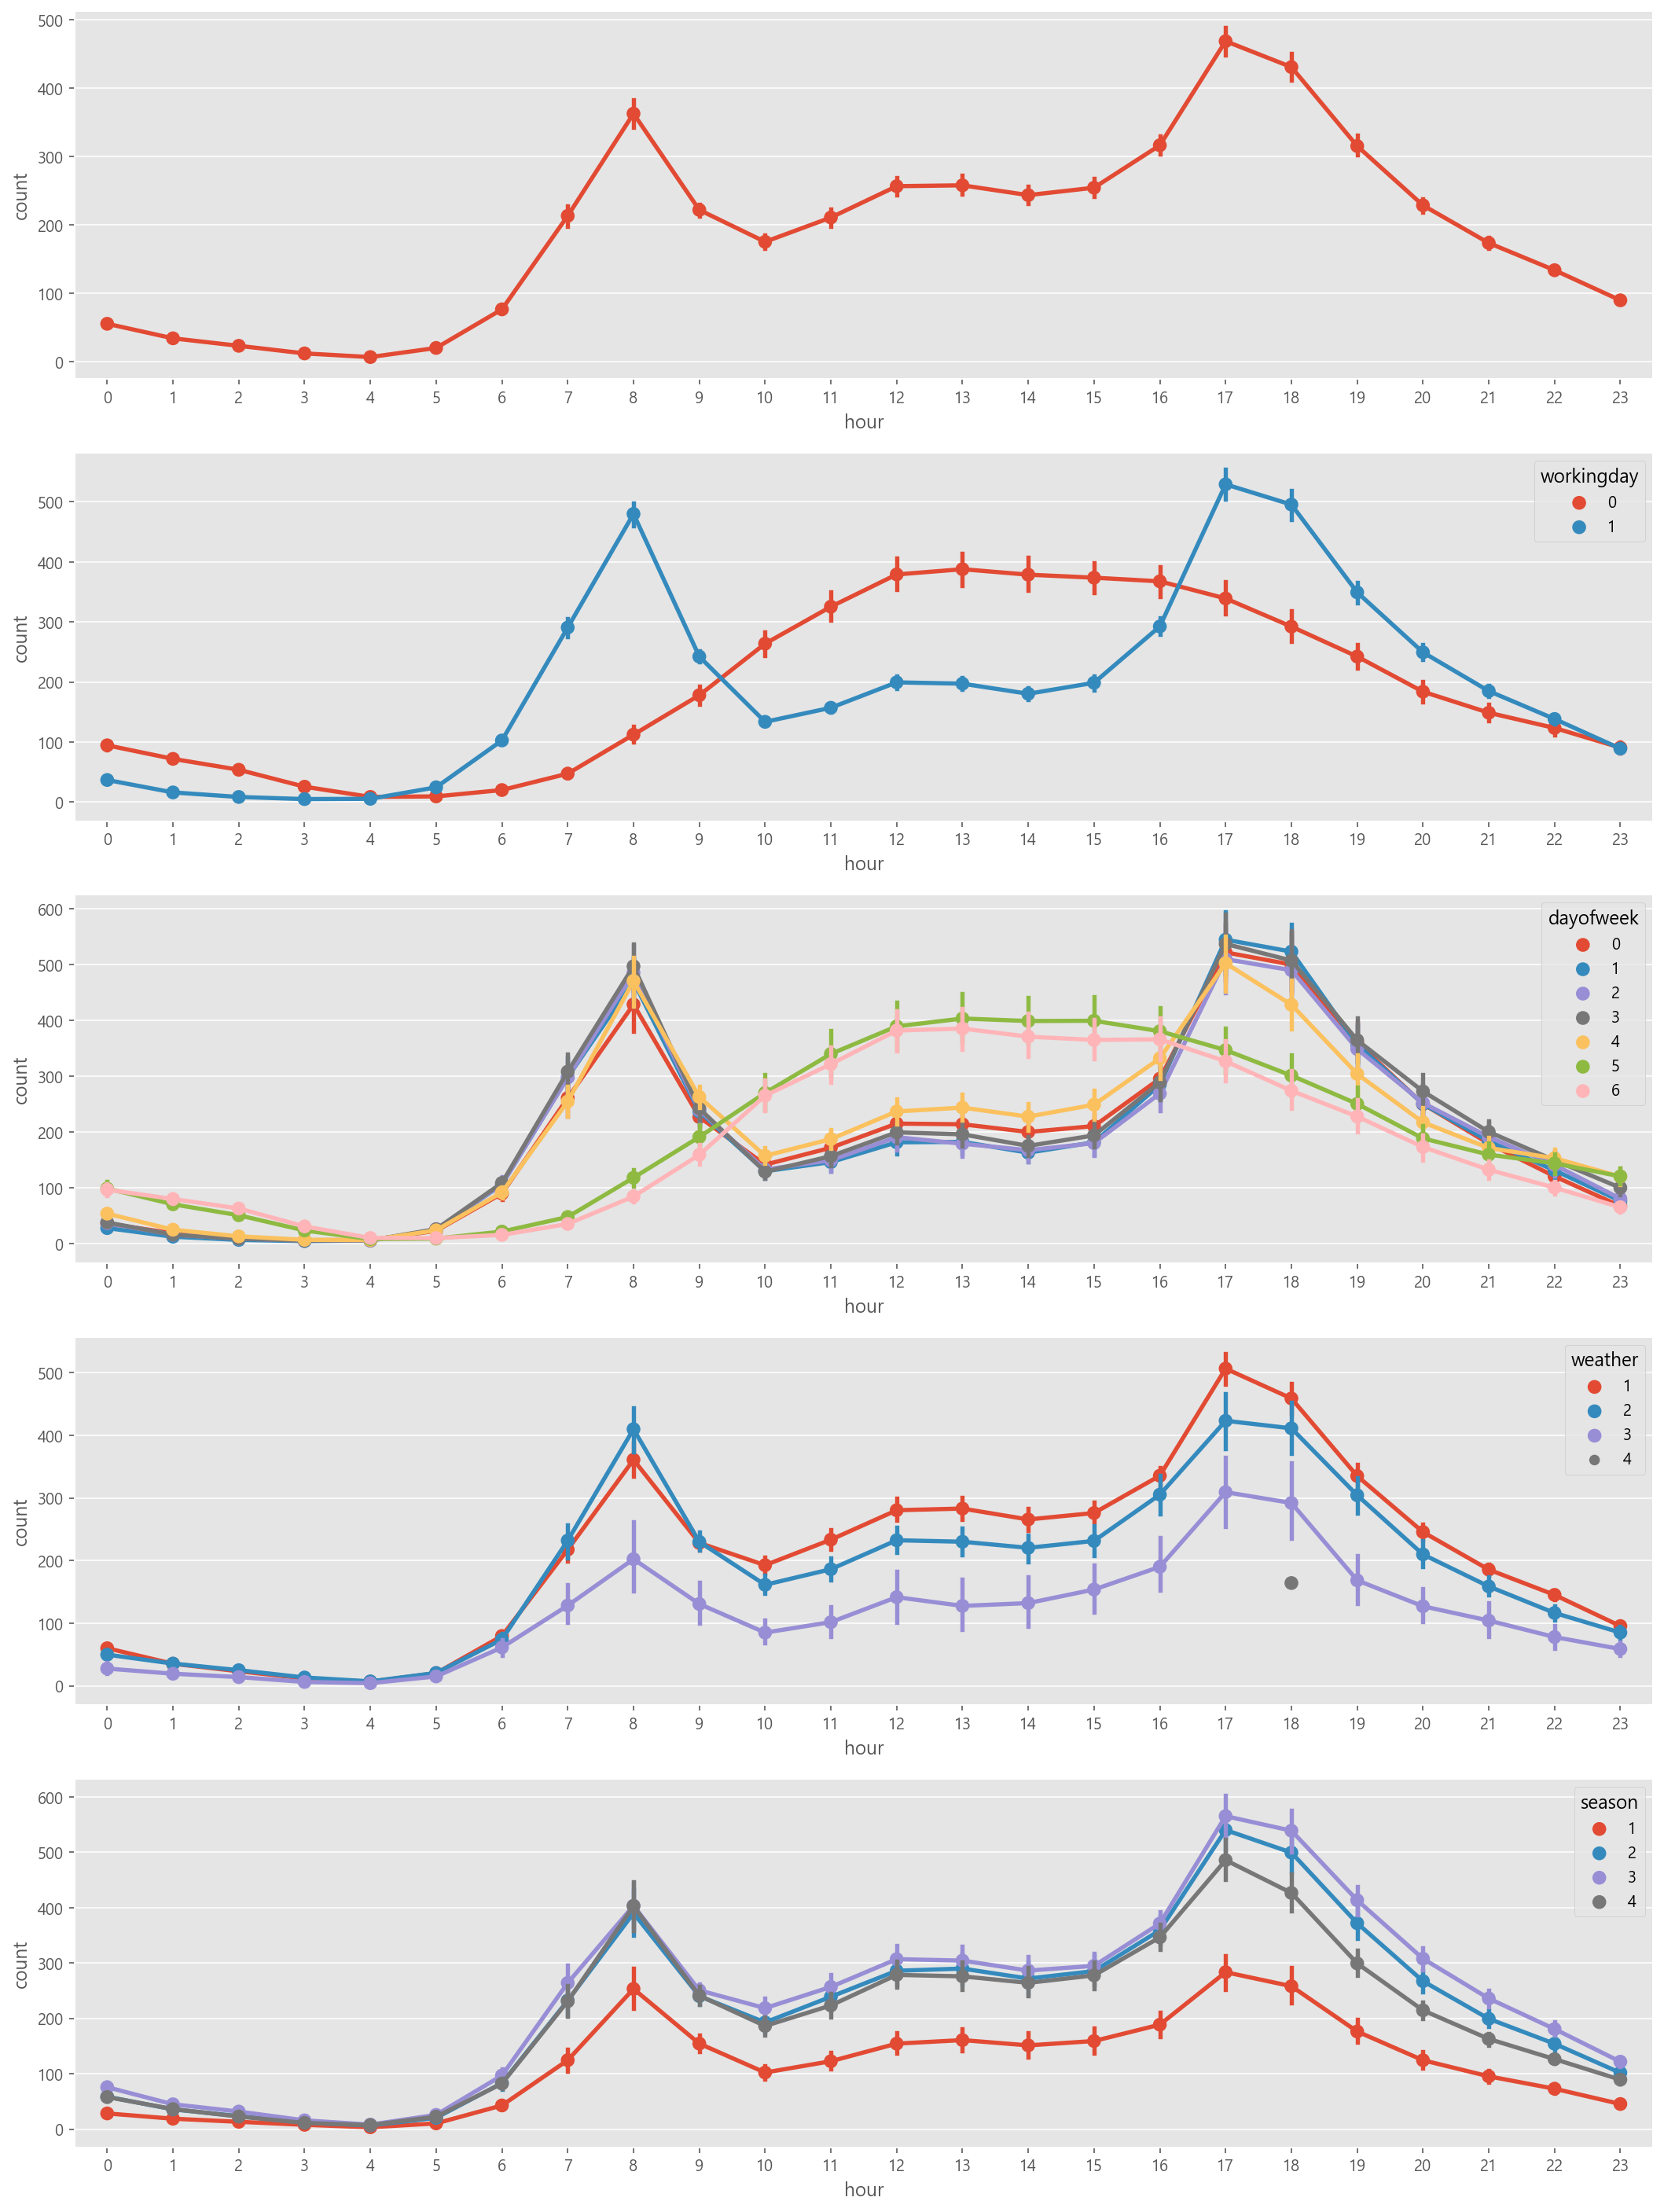

In [16]:
fig,(ax1,ax2,ax3,ax4,ax5)= plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=train, x="hour", y="count", ax = ax1)

sns.pointplot(data=train, x="hour", y="count", hue="workingday",ax=ax2)

sns.pointplot(data=train, x="hour", y="count", hue="dayofweek", ax=ax3)

sns.pointplot(data=train, x="hour", y="count", hue="weather", ax=ax4)

sns.pointplot(data=train, x="hour", y="count", hue="season", ax=ax5)

In [17]:
#연속 변수의 상관관계
corr_col=train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corrMat = corr_col.corr()
print(corrMat)

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


In [18]:
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False
mask

array([[ 0.        ,  0.98494811,  0.46709706,  0.31857128, -0.06494877,
        -0.01785201,  0.39445364],
       [ 0.        ,  0.        ,  0.46206654,  0.31463539, -0.04353571,
        -0.057473  ,  0.38978444],
       [ 0.        ,  0.        ,  0.        ,  0.49724969, -0.3481869 ,
         0.09227619,  0.69041357],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.26545787,
         0.09105166,  0.97094811],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.31860699, -0.31737148],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.10136947],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

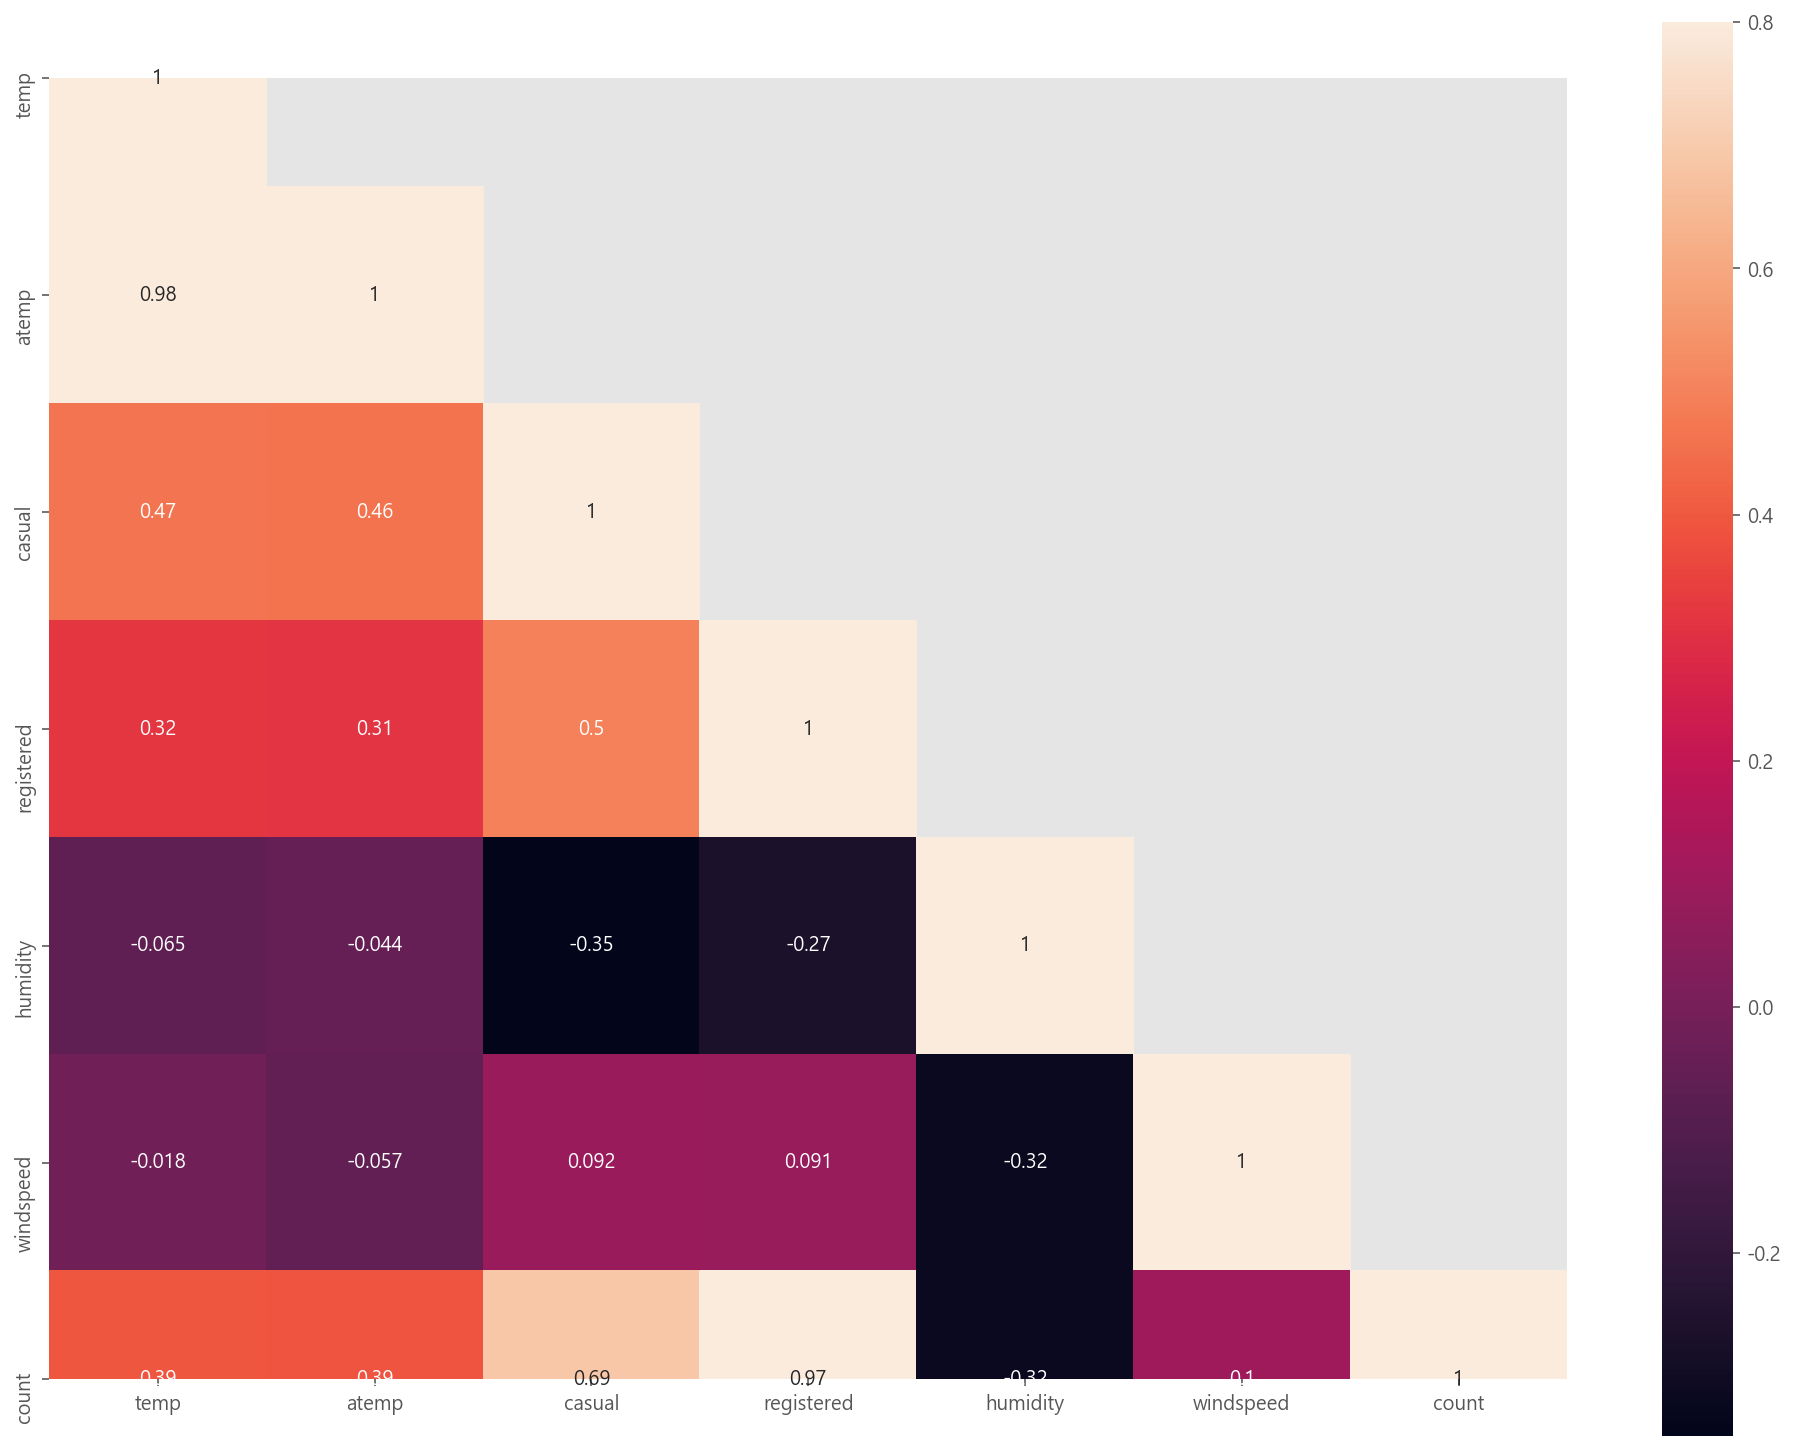

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(17,13)
sns.heatmap(corrMat,mask=mask, vmax=0.8, square=True, annot=True)

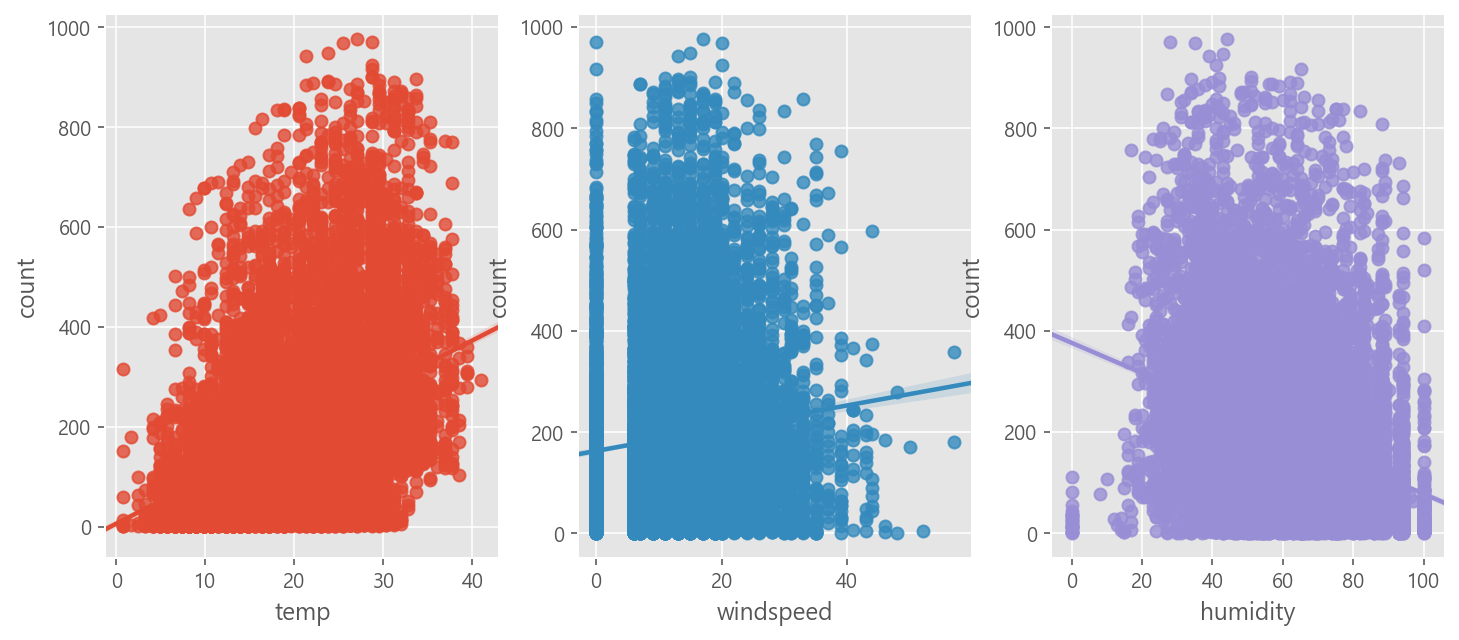

In [20]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="temp", y="count", data=train,ax=ax1)
sns.regplot(x="windspeed", y="count", data=train,ax=ax2)
sns.regplot(x="humidity", y="count", data=train,ax=ax3)

- 풍속의 0들은 nan 일것같다.

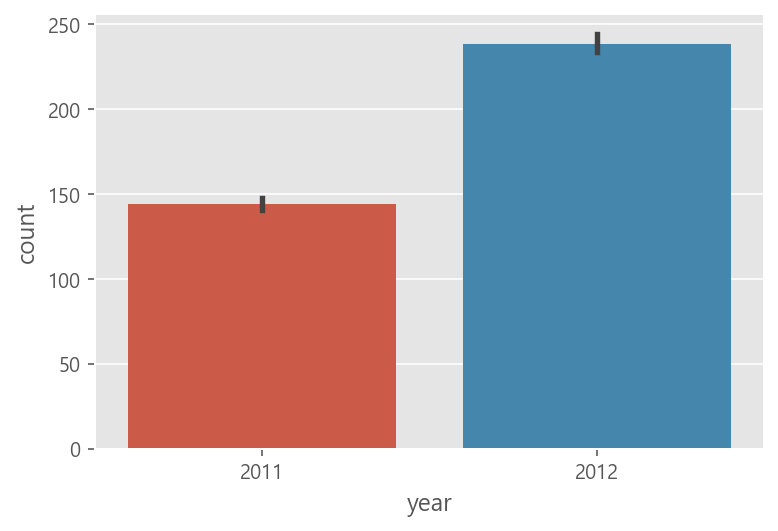

In [21]:
sns.barplot(data=train, x="year", y="count")
plt.show()

In [22]:
def year_month(datetime):
    return "{0}-{1}".format(datetime["year"],datetime["month"])

train["year_month"]=train.apply(year_month,axis=1)
train[["datetime","year_month"]]

,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1
...,...,...
10881,2012-12-19 19:00:00,2012-12
10882,2012-12-19 20:00:00,2012-12
10883,2012-12-19 21:00:00,2012-12
10884,2012-12-19 22:00:00,2012-12


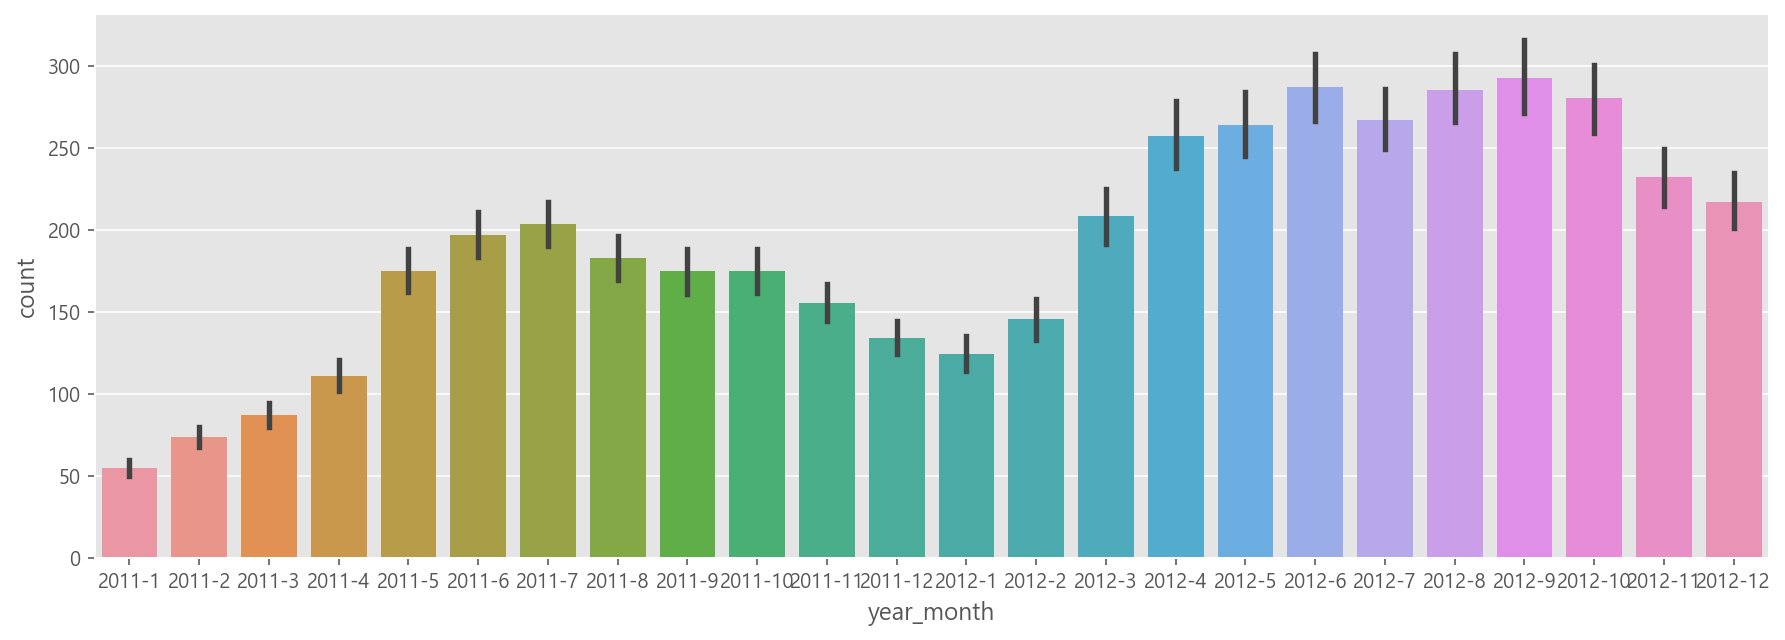

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(data=train,x="year_month",y="count")

- 11년보다 12년이 대여량이 많아졌다.
- 겨울보다 따뜻할 때 대여량이 더 많다.

In [24]:
# trainWithoutOutliers
trainWithoutOutliers = train[np.abs(train["count"] - train["count"].mean()) <= (3*train["count"].std())]

print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(10739, 20)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229765, 4.562423868087808, 0.9581176780909608))

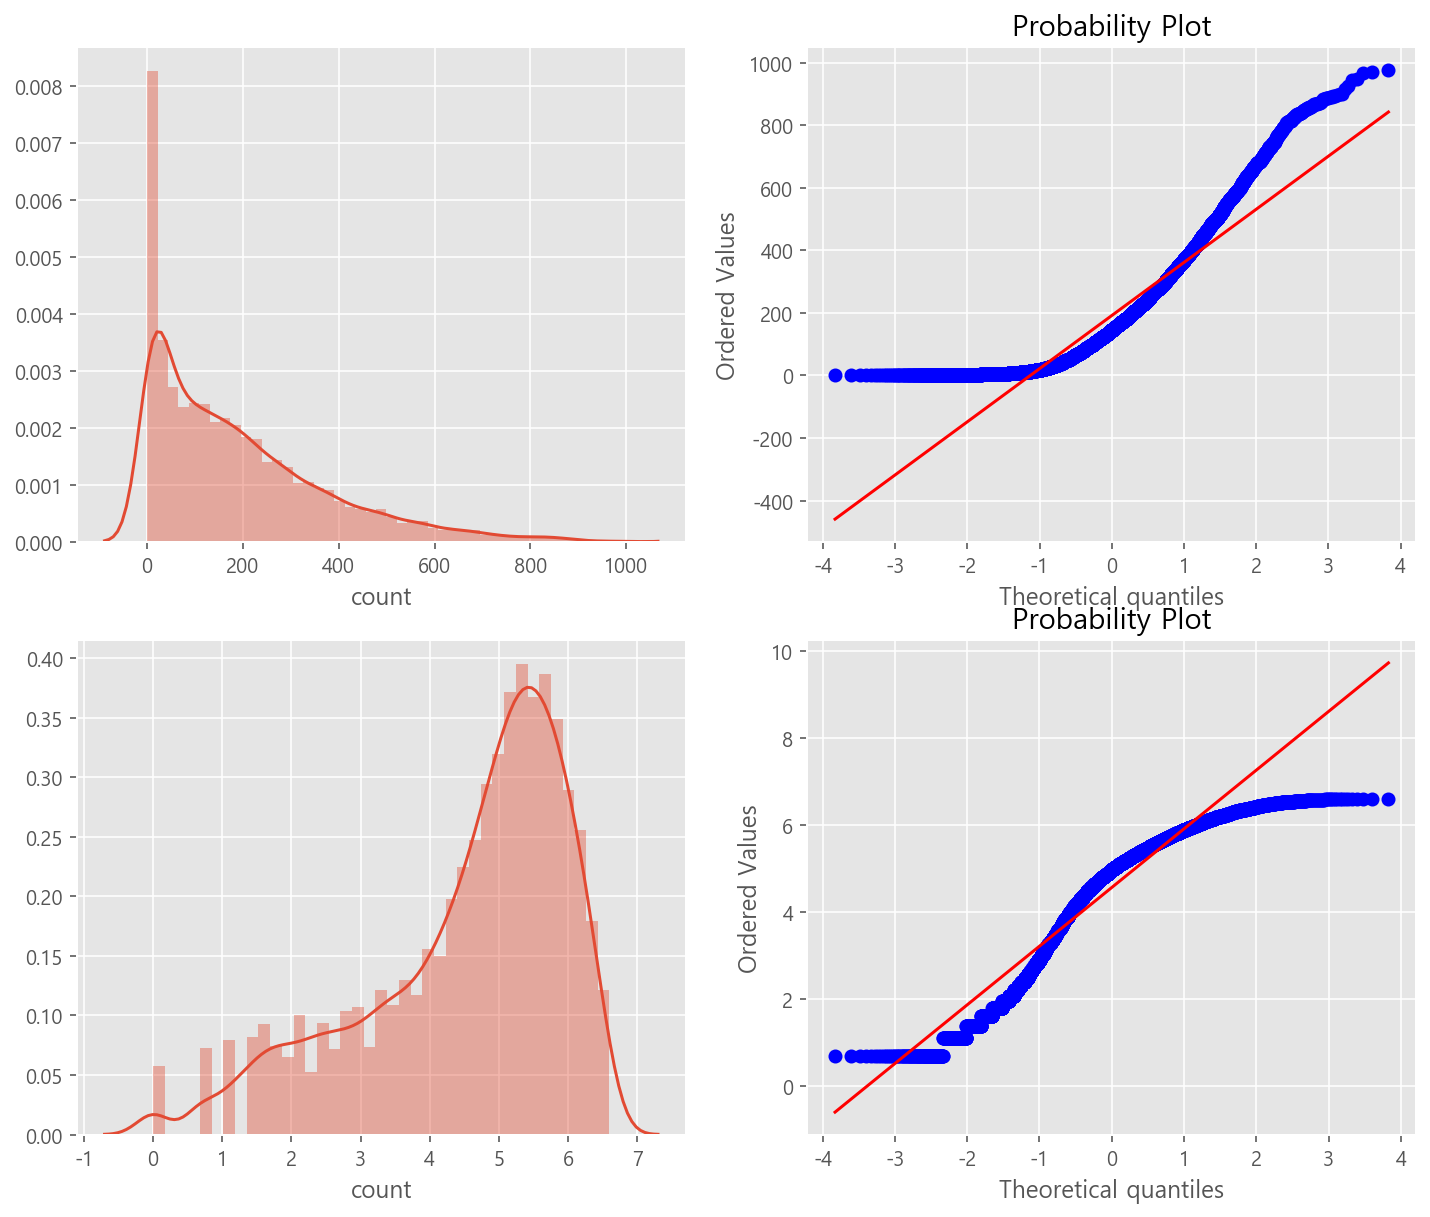

In [25]:
# count값의 데이터 분포도를 파악
figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12, 10)

sns.distplot(train["count"], ax=axes[0][0])
stats.probplot(train["count"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(trainWithoutOutliers["count"]), ax=axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers["count"]), dist='norm', fit=True, plot=axes[1][1])

# ML 적용하기

### 랜덤 포레스트

In [41]:
train_rf = pd.read_csv("D:/07_Kaggle/01_bikesharingdemansion/train.csv",parse_dates=["datetime"])
train_rf["year"] = train_rf["datetime"].dt.year
train_rf["month"] = train_rf["datetime"].dt.month
train_rf["day"] = train_rf["datetime"].dt.day
train_rf["hour"] = train_rf["datetime"].dt.hour
train_rf["minute"] = train_rf["datetime"].dt.minute
train_rf["second"] = train_rf["datetime"].dt.second
train_rf["dayofweek"] =train_rf["datetime"].dt.dayofweek
train_rf.shape

(10886, 19)

In [42]:
test_rf = pd.read_csv("D:/07_Kaggle/01_bikesharingdemansion/test.csv",parse_dates=["datetime"])
test_rf["year"] = test_rf["datetime"].dt.year
test_rf["month"] = test_rf["datetime"].dt.month
test_rf["day"] = test_rf["datetime"].dt.day
test_rf["hour"] = test_rf["datetime"].dt.hour
test_rf["minute"] = test_rf["datetime"].dt.minute
test_rf["second"] = test_rf["datetime"].dt.second
test_rf["dayofweek"] = test_rf["datetime"].dt.dayofweek
test_rf.shape

(6493, 16)

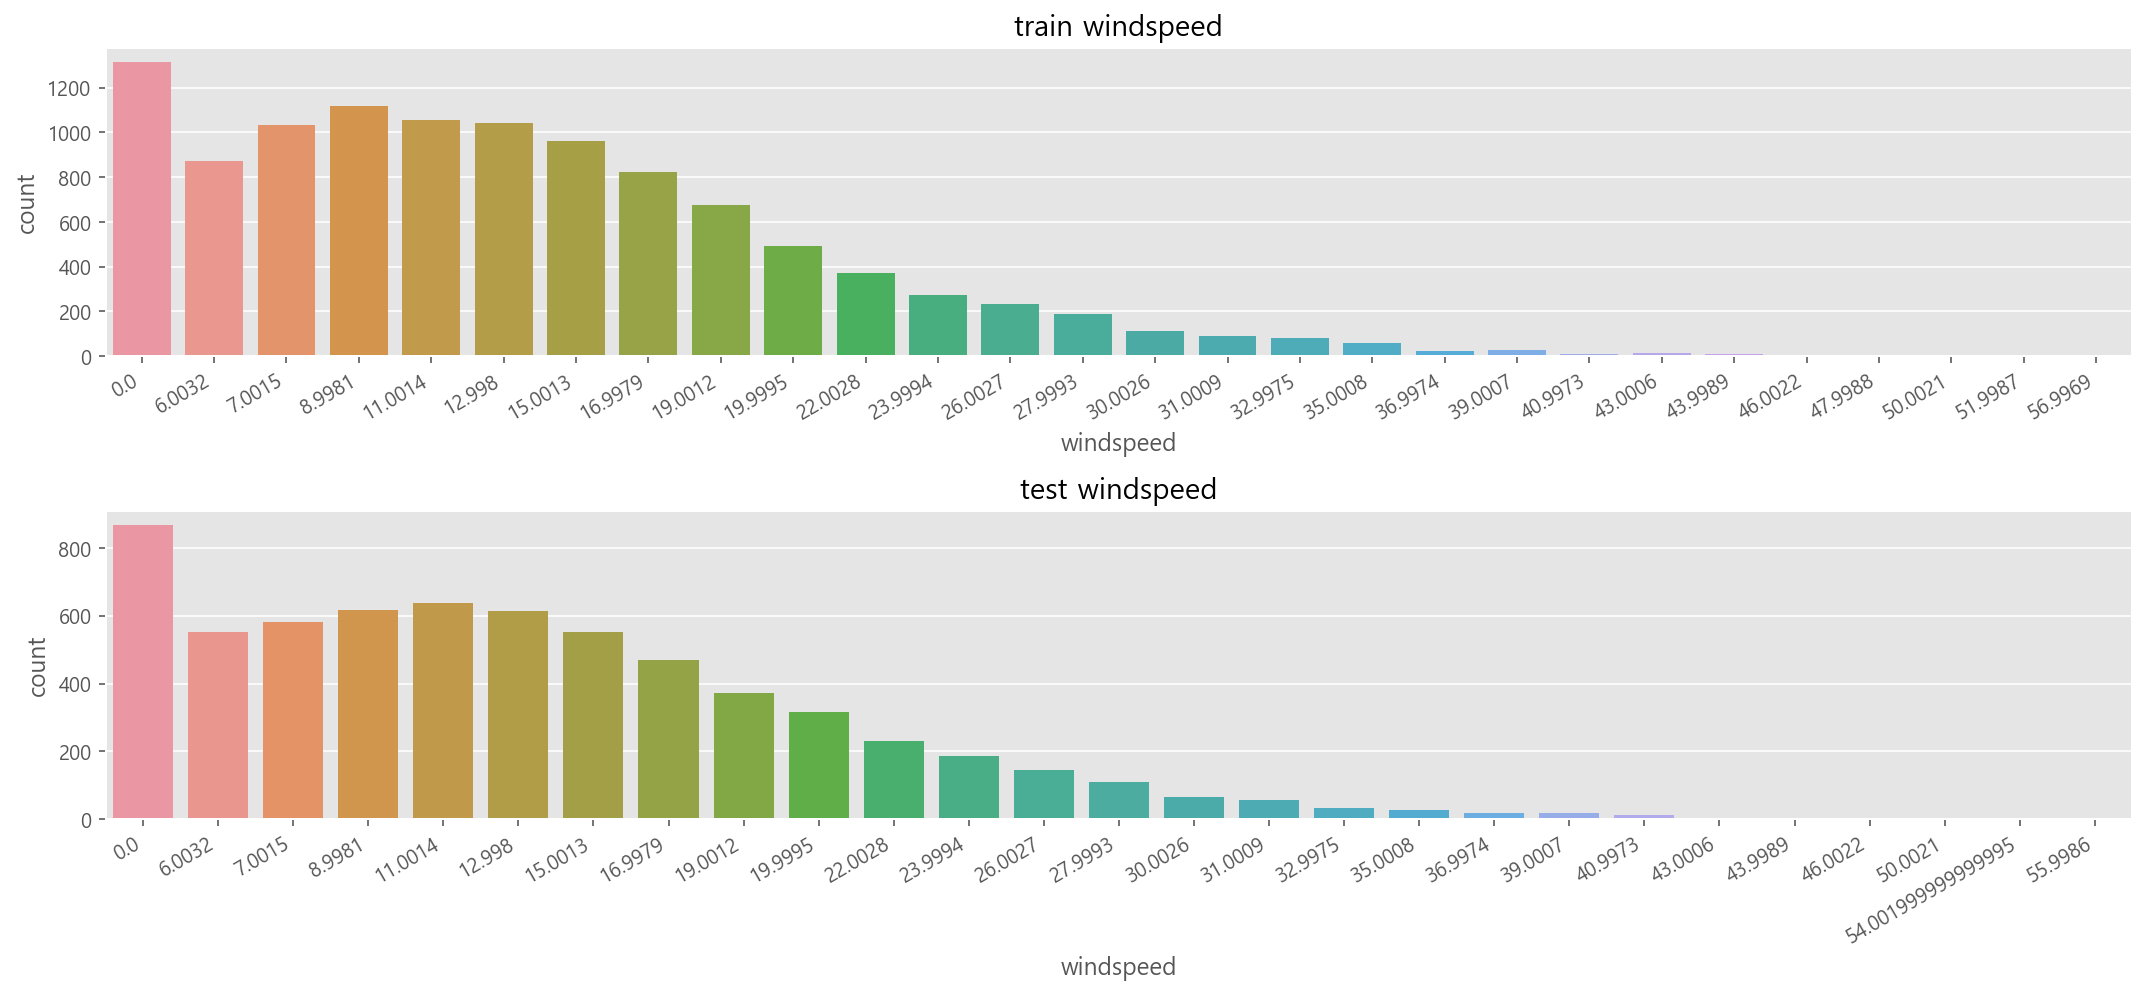

In [43]:
#windspeed 의 0값을 예측해서 넣어주자
fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(15,7)

plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
axes[0].set(ylabel='Count',title="train windspeed")
sns.countplot(data=train_rf, x="windspeed",ax=axes[0])

plt.sca(axes[1])
axes[1].set(ylabel="Count",title="test windspeed")
plt.xticks(rotation=30, ha='right')
sns.countplot(data=test_rf, x="windspeed",ax=axes[1])


plt.tight_layout()

In [44]:
# 0인 windspeed 값을 채워주자
trainWind0_rf = train_rf.loc[train_rf['windspeed'] == 0]
trainWindNot0_rf = train_rf.loc[train_rf['windspeed'] != 0]

In [45]:
# 랜덤포레스트로 채워주는 함수
from sklearn.ensemble import RandomForestClassifier

def windspeed_RF(data):
    data=train_rf
    # 사용할 피처
    wCol=["season", "weather", "humidity", "month", "temp", "year", "atemp"]

    # 풍속이 0인것과 아닌 것을 나누어 준다.
    dataWind0 = data[data['windspeed'] == 0]
    dataWindNot0 = data[data['windspeed'] != 0]

    # 랜덤포레스트 이용
    rf_wind = RandomForestClassifier()

    # 풍속이 0이 아닌 데이터들의 타입을 스트링으로 바꿔준다.
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")

    #학습
    rf_wind.fit(dataWindNot0[wCol],dataWindNot0["windspeed"])

    #예측 후 대입
    dataWind0["windspeed"]=rf_wind.predict(X = dataWind0[wCol])

    #채운값과 0이아니었던 df 합치고 인덱스 순으로 정렬
    result = pd.concat([dataWind0,dataWindNot0]).sort_index()

    # 풍속의 데이터타입을 float으로 지정해 준다.
    result["windspeed"] = result["windspeed"].astype("float")

    return result

C:\Users\meuch\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\meuch\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\meuch\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


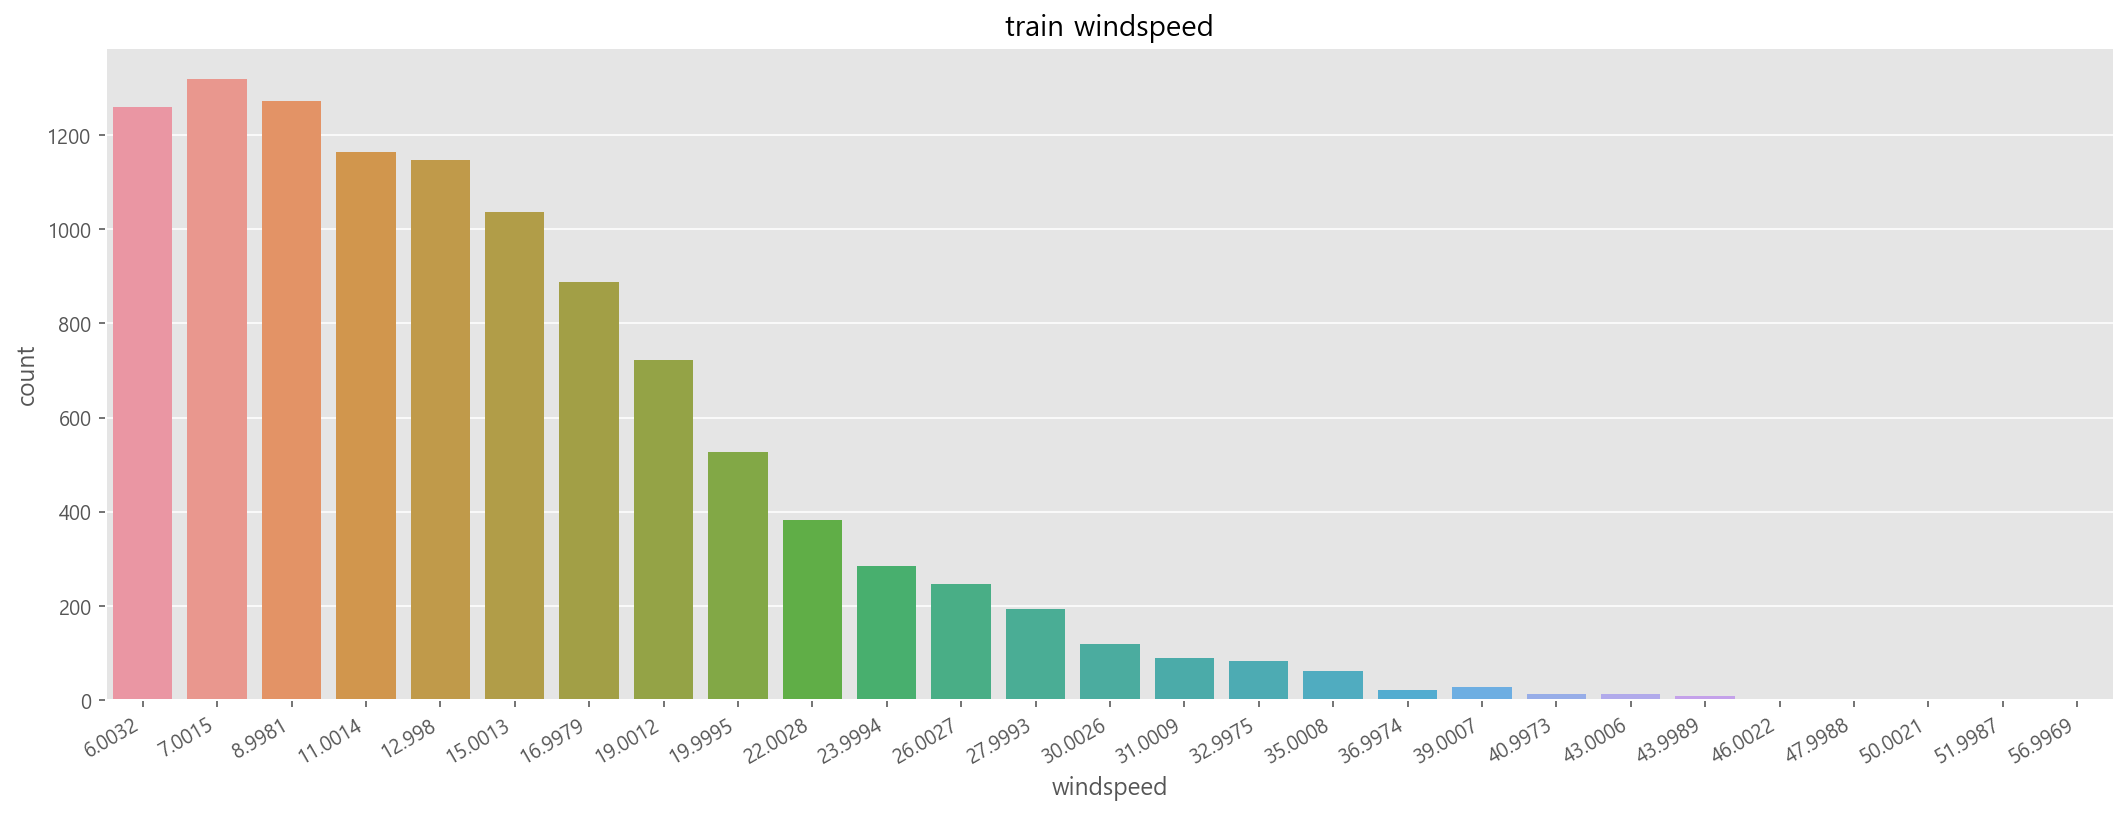

In [46]:
# 0 채우기(함수실행)
train_rf = windspeed_RF(train_rf)
fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)

plt.sca(ax1)
plt.xticks(rotation=30, ha='right')
ax1.set(ylabel='Count',title="train windspeed")
sns.countplot(data=train_rf, x="windspeed", ax=ax1)

# Feature Selection
 - 신호와 소음을 구분한다
 - 피처가 많다고 해서 무조건 좋은 성능을 내는 것이 아니다.
 - 피처를 하나씩 추가하고 변경해 가면서 성능이 좋지 않은 피처는 제거하도록 한다.

In [50]:
categorical_feature_names = ["season","holiday","workingday","weather",
                             "dayofweek","month","year","hour"]

for var in categorical_feature_names:
    train_rf[var]=train_rf[var].astype("category")
    test_rf[var]=test_rf[var].astype("category")
    

In [51]:
feature_names = ["season", "weather", "temp", "atemp", "humidity", "windspeed",
                 "year", "hour", "dayofweek", "holiday", "workingday"]

feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [52]:
X_train = train_rf[feature_names]

print(X_train.shape)
X_train.head()

(10886, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,9.84,14.395,81,6.0032,2011,0,5,0,0
1,1,1,9.02,13.635,80,6.0032,2011,1,5,0,0
2,1,1,9.02,13.635,80,6.0032,2011,2,5,0,0
3,1,1,9.84,14.395,75,6.0032,2011,3,5,0,0
4,1,1,9.84,14.395,75,6.0032,2011,4,5,0,0


In [53]:
X_test = test_rf[feature_names]

print(X_test.shape)
X_test.head()

(6493, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,26.0027,2011,0,3,0,1
1,1,1,10.66,13.635,56,0.0000,2011,1,3,0,1
2,1,1,10.66,13.635,56,0.0000,2011,2,3,0,1
3,1,1,10.66,12.880,56,11.0014,2011,3,3,0,1
4,1,1,10.66,12.880,56,11.0014,2011,4,3,0,1


In [55]:
y_train = train_rf['count']

print(y_train.shape)
y_train.head()

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

# Score :: RMSLE

In [56]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    # 1을 더하는 이유는 0일때 마이너스 무한대가 되기 때문에 1을 더해주고 로그를 씌운다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

# Cross Validation

In [57]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# Random Forest Prediction

In [58]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100,
                             n_jobs=-1,
                             random_state=0)


In [59]:
%time score = cross_val_score(model, X_train, y_train, cv = k_fold, scoring = rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

Wall time: 18.5 s
Score= 0.32987


In [60]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [61]:
predictions = model.predict(X_test)
print(predictions.shape)
predictions[0:10]

(6493,)


array([ 11.69      ,   4.8       ,   4.15333333,   3.64      ,
         3.15      ,   6.8       ,  39.22      , 107.26      ,
       242.39      , 135.99      ])

[Text(0.5, 1.0, 'test')]

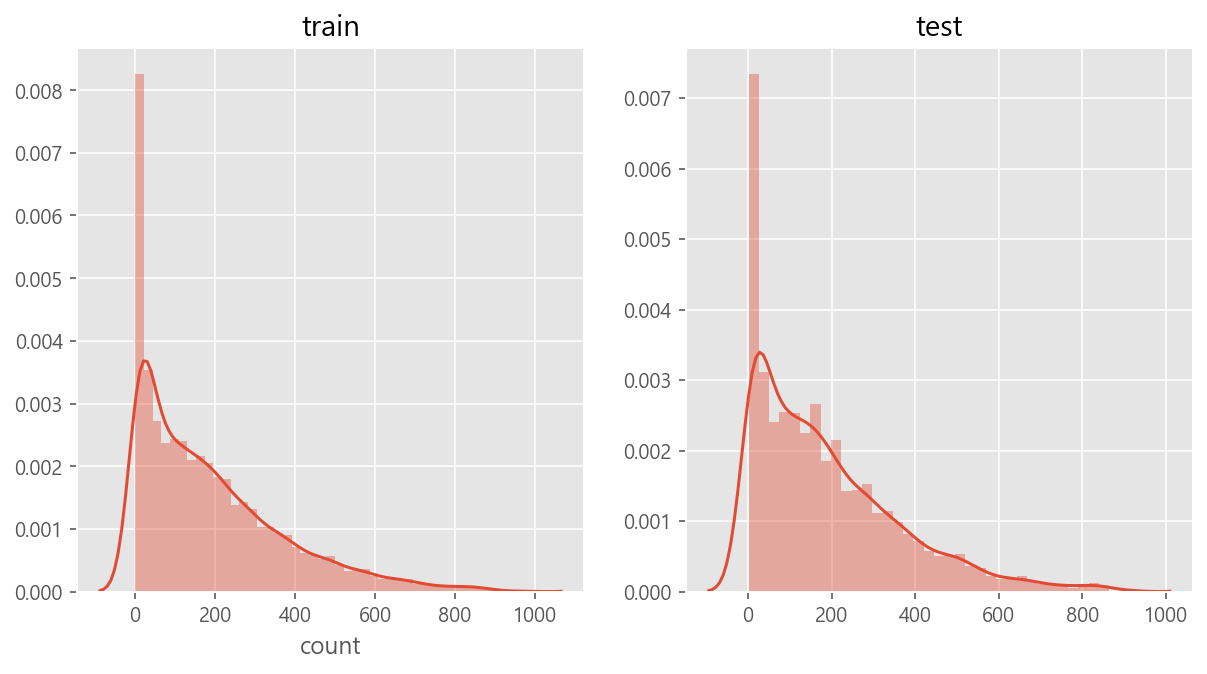

In [63]:
fig, (ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(10,5)
sns.distplot(y_train,ax=ax1)
ax1.set(title="train")
sns.distplot(predictions,ax=ax2)
ax2.set(title="test")

In [ ]:
submission = pd.read_csv("D:/07_Kaggle/sampleSubmission.csv")
submission["count"]=predictions

submission.to_csv("D:/07_Kaggle/Score_{0:.5f}_submission.csv".format(score), index=False)

In [ ]:
428/3251

#EDA & Ensemble Model (Top 10 Percentile) | Kaggle
https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile
    
#How to finish top 10 percentile in Bike Sharing Demand Competition In Kaggle? (part -1)
https://colab.research.google.com/drive/1aD1AWEshSX3VuCMvH2_emUuv7EKcc9eu#scrollTo=p1NASWPQe7rr&line=3&uniqifier=1
    
#How to finish top 10 percentile in Bike Sharing Demand Competition In Kaggle? (part -2)    
https://medium.com/@viveksrinivasan/how-to-finish-top-10-percentile-in-bike-sharing-demand-competition-in-kaggle-part-2-29e854aaab7d

# 다양한 기법 사용해보기

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from scipy import stats

In [2]:
# 노트북에 plot 그리기
%matplotlib inline    
# plot의 글씨 선명하게
%config InlineBackend.figure_format = 'retina'  

plt. style.use('ggplot')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) # Mac의 경우는 AppleGothic, 윈도우의 경우는 Malgun Gothic을 사용하면 됩니다 :) 
mpl.rc('axes', unicode_minus=False)

In [4]:
raw_train = pd.read_csv("D:/07_Kaggle/01_bikesharingdemansion/train.csv",parse_dates=["datetime"])
train=raw_train.copy()
raw_test=pd.read_csv("D:/07_Kaggle/01_bikesharingdemansion/test.csv",parse_dates=["datetime"])
test=raw_test.copy()

train.shape, test.shape


((10886, 12), (6493, 9))

In [5]:
# 날짜열 분리
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["hour"] = train["datetime"].dt.hour
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 16)

In [6]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["hour"] = test["datetime"].dt.hour
test["dayofweek"] = test["datetime"].dt.dayofweek
test.shape

(6493, 13)

In [8]:
# 데이터 형별로 분류하고 categorical변수는 type을 변경
categorical_feature_names = ["season","holiday","workingday","weather",
                             "dayofweek","month","year","hour"]
train[categorical_feature_names]=train[categorical_feature_names].astype("category")

# 랜덤포레스트로 windspeed 수정해주는 함수

In [26]:
from sklearn.ensemble import RandomForestClassifier

def windspeed_RF(data):
    # 사용할 피처
    wCol=["season", "weather", "humidity", "month", "temp", "year", "atemp"]

    # 풍속이 0인것과 아닌 것을 나누어 준다.
    dataWind0 = data[data['windspeed'] == 0]
    dataWindNot0 = data[data['windspeed'] != 0]

    # 랜덤포레스트 이용
    rf_wind = RandomForestClassifier()

    # 풍속이 0이 아닌 데이터들의 타입을 스트링으로 바꿔준다.
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")

    #학습
    rf_wind.fit(dataWindNot0[wCol],dataWindNot0["windspeed"])

    #예측 후 대입
    dataWind0["windspeed"]=rf_wind.predict(X = dataWind0[wCol])

    #채운값과 0이아니었던 df 합치고 인덱스 순으로 정렬
    result = pd.concat([dataWind0,dataWindNot0]).sort_index()

    # 풍속의 데이터타입을 float으로 지정해 준다.
    result["windspeed"] = result["windspeed"].astype("float")

    return result

In [36]:
# 사용할 변수 선택

## windspeed를 예측해서 하느냐 아니냐
def isin_wind(asw='x'):
    if asw=='x':
        feature = ["season", "weather", "temp", "atemp", "humidity",
                         "year", "hour", "dayofweek", "holiday", "workingday"
                        ]
       
    else:
        feature = ["season", "weather", "temp", "atemp", "humidity",
                         "year", "hour", "dayofweek", "holiday", "workingday",
                         "windspeed"
                        ]
    return feature
    

In [ ]:
# windspeed 안채울 때
feature_names=isin_wind('x')

In [39]:
# windspeed 채울 때
feature_names=isin_wind('o')
train = windspeed_RF(train)


C:\Users\meuch\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\meuch\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [11]:
X_train = train[feature_names]
X_test = test[feature_names]
y_train = train["count"]

In [41]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values, convertExp=True):

    if convertExp:
        predicted_values = np.exp(predicted_values),
        actual_values = np.exp(actual_values)
        
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    # 값이 0일 수도 있어서 로그를 취했을 때 마이너스 무한대가 될 수도 있기 때문에 1을 더해 줌
    # 로그를 씌워주는 것은 정규분포로 만들어주기 위해
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

1. 선형 회귀

In [42]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

li_model = LinearRegression()

y_train_log=np.log1p(y_train)
li_model.fit(X_train, y_train_log)

preds=li_model.predict(X_train)

print ("RMSLE Value For Linear Regression: ",
       rmsle(np.exp(y_train_log),np.exp(preds), False))

RMSLE Value For Linear Regression:  0.9803697923313498


2. 릿지 l2

 - 회귀를 위한 선형 모델
 - 가중치의 모든 원소가 0에 가깝게 만들어, 모든 피처가 주는 영향을 최소화(기울기를 작게 만듦)
 - Regularization는 오버피팅이 되지 않도록 모델을 장제로 제한한다.
 - max_iter(반복 실행하는 최대 횟수)

In [43]:
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.01, 0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)

y_train_log = np.log1p(y_train)
grid_ridge_m.fit( X_train, y_train_log )
preds = grid_ridge_m.predict(X_train)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ", rmsle(np.exp(y_train_log),np.exp(preds), False))

df = pd.DataFrame(grid_ridge_m.cv_results_)
df.head()

{'alpha': 0.01, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9803697902780821


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019348,0.006955,0.005385,0.000489,0.01,3000,"{'alpha': 0.01, 'max_iter': 3000}",-1.003138,-0.906726,-1.029928,-1.016631,-0.982313,-0.987749,0.043459,1
1,0.010174,0.000977,0.003989,0.000630,0.1,3000,"{'alpha': 0.1, 'max_iter': 3000}",-1.003140,-0.906726,-1.029928,-1.016630,-0.982315,-0.987749,0.043459,2
2,0.009775,0.000746,0.004188,0.000746,1,3000,"{'alpha': 1, 'max_iter': 3000}",-1.003167,-0.906727,-1.029927,-1.016621,-0.982331,-0.987756,0.043459,3
3,0.010771,0.000747,0.003989,0.000631,2,3000,"{'alpha': 2, 'max_iter': 3000}",-1.003196,-0.906728,-1.029926,-1.016612,-0.982349,-0.987764,0.043459,4
4,0.010373,0.000798,0.003590,0.000798,3,3000,"{'alpha': 3, 'max_iter': 3000}",-1.003226,-0.906729,-1.029925,-1.016602,-0.982366,-0.987771,0.043459,5


In [44]:
df["alpha"] = df["params"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_test_score"].apply(lambda x:-x)
df[["alpha", "rmsle"]].head()

,alpha,rmsle
0,0.01,0.987749
1,0.10,0.987749
2,1.00,0.987756
3,2.00,0.987764
4,3.00,0.987771


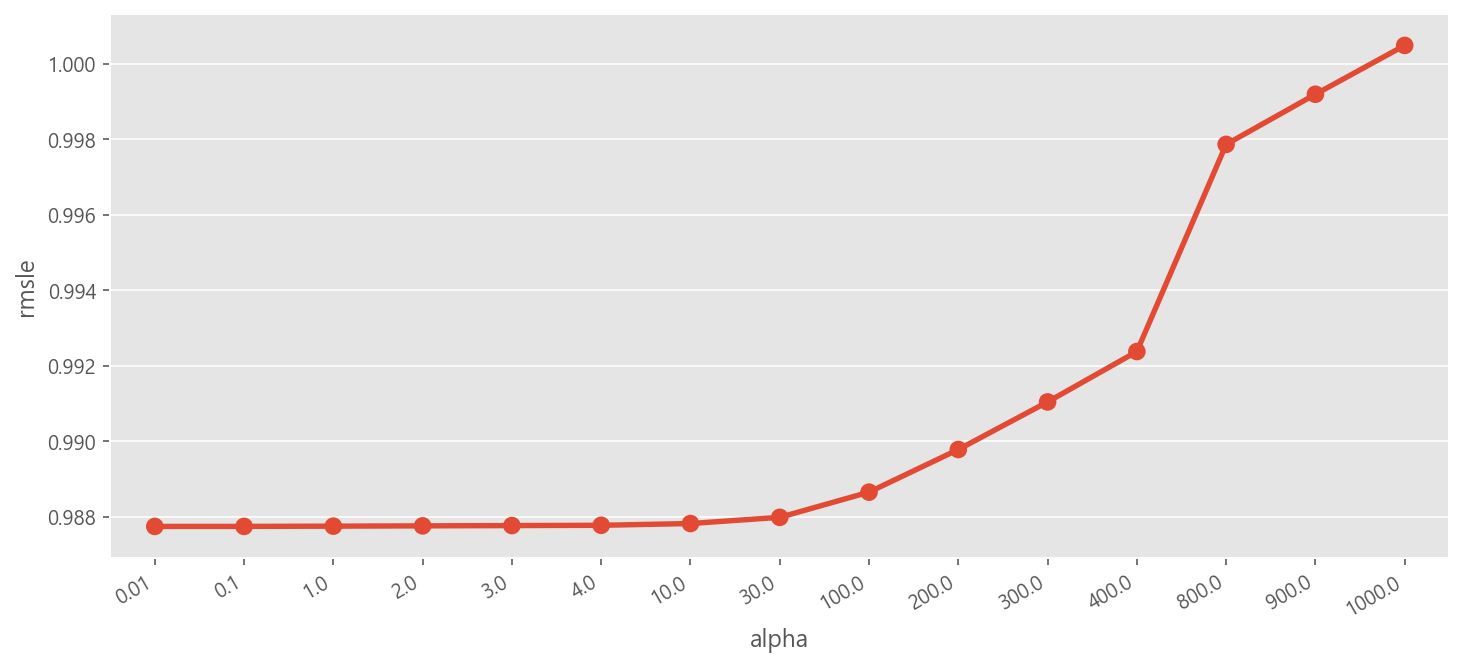

In [45]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df,x="alpha",y="rmsle",ax=ax)

2. Lasso
 - 선형회귀의 Regularization을 적용하는 방안
 - 계수를 0으로 만들기도 하여 변수를 제거하는 효과가 있음.(피처선택)

In [46]:
lasso_m_ = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
y_train_log = np.log1p(y_train)
grid_lasso_m.fit( X_train , y_train_log )
preds = grid_lasso_m.predict(X_train)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(y_train_log),np.exp(preds),False))

df = pd.DataFrame(grid_lasso_m.cv_results_)
df["alpha"] = df["params"].apply(lambda x:x["alpha"])
df["rmsle"] = df["mean_test_score"].apply(lambda x:-x)

df[["alpha", "rmsle"]].head()

{'alpha': 0.00125, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.9803727821457646


,alpha,rmsle
0,10.000000,1.397134
1,1.000000,1.071961
2,0.500000,1.062121
3,0.333333,1.060826
4,0.250000,1.061149


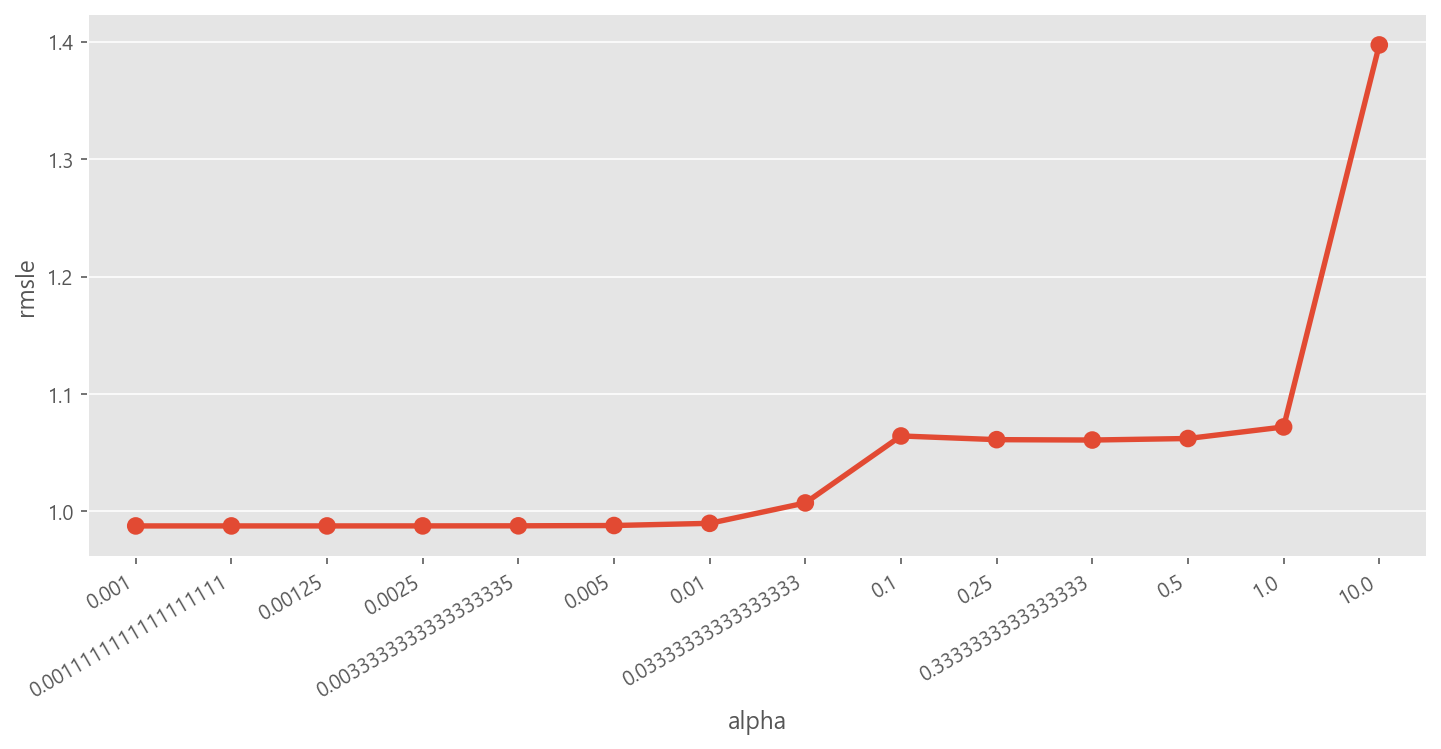

In [47]:
fig,ax= plt.subplots()
fig.set_size_inches(12,5)
plt.xticks(rotation=30, ha='right')
sns.pointplot(data=df,x="alpha",y="rmsle",ax=ax)

3. 랜덤포레스트

In [64]:
from sklearn.ensemble import RandomForestRegressor
estimator=[50,100,150,200]
df=pd.DataFrame({"estimator" : estimator,
                 "score":0})
for i,j in zip(estimator,range(len(df))):
    rfModel = RandomForestRegressor(n_estimators=i)
    y_train_log = np.log1p(y_train)
    rfModel.fit(X_train, y_train_log)

    preds = rfModel.predict(X_train)
    df.iloc[j,1]=rmsle(np.exp(y_train_log),np.exp(preds),False)
    
df


,estimator,score
0,50,0.109942
1,100,0.107218
2,150,0.105870
3,200,0.105840


In [133]:
est=120
predsTest_rf = RandomForestRegressor(n_estimators=est)
y_train_log = np.log1p(y_train)
predsTest_rf.fit(X_train, y_train_log)
preds = predsTest_rf.predict(X_train)
score = rmsle(np.exp(y_train_log),np.exp(preds),False)
print ("RMSLE Value For Gradient Boost: ", score)

preds_rf = rfModel.predict(X_test)

RMSLE Value For Gradient Boost:  0.10673501903318094


In [134]:
submission = pd.read_csv("D:/07_Kaggle/01_bikesharingdemansion/sampleSubmission.csv")

submission["count"] = np.exp(preds_rf)

submission.to_csv("D:/07_Kaggle/01_bikesharingdemansion/rf{1}_Score_{0:.5f}_submission.csv".format(score,est), index=False)

4. 그라디언트 부스트
 - 여러개의 결정트리를 묶어 강력한 모델을 만드는 앙상블 기법
 - 회귀와 분류에 모두 사용할 수 있음
 - 랜덤포레스트와 달리 이진 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다.
 - 무작위성이 없고 강력한 사전 가지치기가 사용된다.
 - 1~5개의 깊지 않은 트리를 사용하기 때문에 메모리를 적게 사용하고 예측이 빠르다.
 - learning_rate : 오차를 얼마나 강하게 보정할 것인지 제어 하는 매개변수
 - n_estimator의 값을 키우면 앙상블에 트리가 더 많이 추가 되어 모델의 복잡도가 커지고 훈련세트에서의 실수를 바로 잡을 기회가 많아
   지만 너무 크면 모델이 복잡해지고 오버피팅일 될 수 있다.
 - max_depth(max_leaf_nodes) 복잡도를 너무 높이지 말고 트리의 깊이가 5보다 깊어지지 않게 한다.

In [75]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000, alpha=0.01);

y_train_log = np.log1p(y_train)
gbm.fit(X_train, y_train_log)

preds = gbm.predict(X_train)
score = rmsle(np.exp(y_train_log),np.exp(preds),False)
print ("RMSLE Value For Gradient Boost: ", score)

RMSLE Value For Gradient Boost:  0.21357403727249377


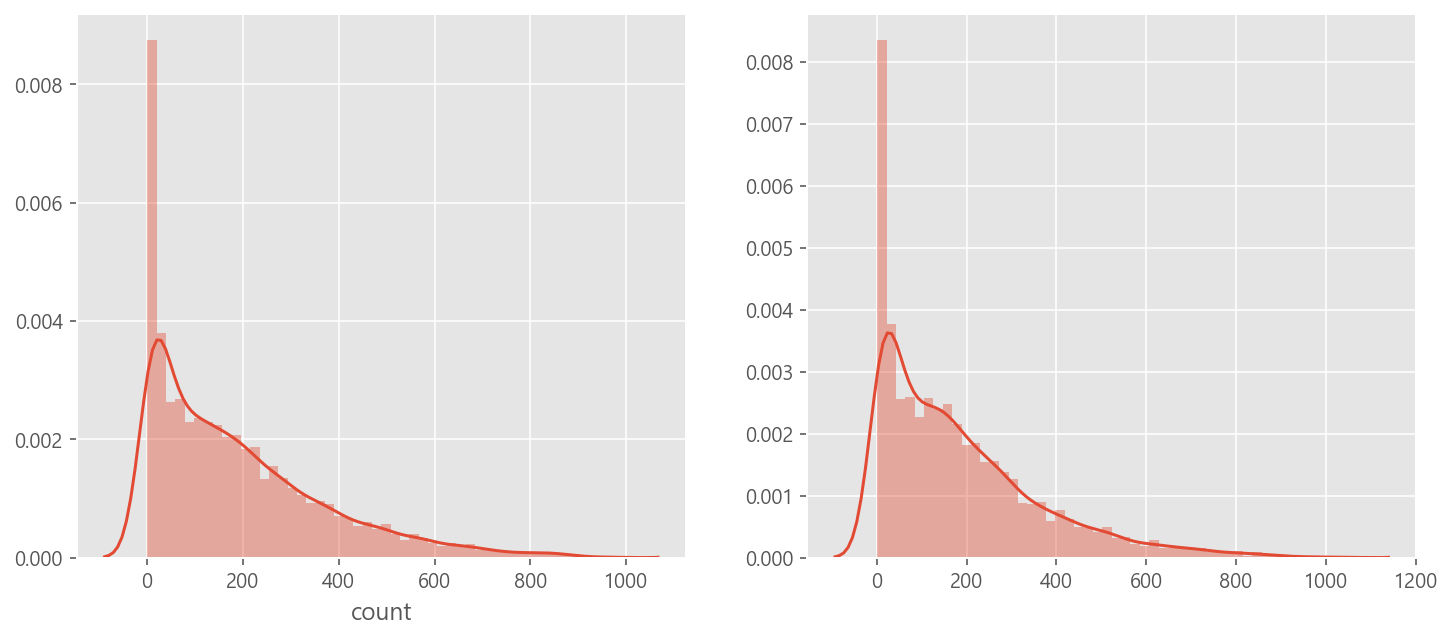

In [76]:
predsTest_gb = gbm.predict(X_test)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
sns.distplot(np.exp(predsTest_gb),ax=ax2,bins=50)

In [77]:
submission = pd.read_csv("D:/07_Kaggle/01_bikesharingdemansion/sampleSubmission.csv")
submission

submission["count"] = np.exp(predsTest_gb)

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.227543
1,2011-01-20 01:00:00,6.296610
2,2011-01-20 02:00:00,4.259238
3,2011-01-20 03:00:00,2.666615
4,2011-01-20 04:00:00,2.295918


In [78]:
submission.to_csv("D:/07_Kaggle/01_bikesharingdemansion/GB_Score_{0:.5f}_submission.csv".format(score), index=False)

In [141]:
print("상위",144/3251*100,"%")

상위 4.429406336511843 %
